In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv("heart.csv", sep=",")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
age = data["age"]
sex = data["sex"]
cp = data["cp"]
trestbps = data["trestbps"]
chol = data["chol"]
fbs = data["fbs"]
restecg = data["restecg"]
thalach = data["thalach"]
exang = data["exang"]
oldpeak = data["oldpeak"]
slope = data["slope"]
ca = data["ca"]
thal = data["thal"]
target = data["target"]

In [12]:
print(age.head())
print(sex.head())
print(cp.head())
print(trestbps.head())
print(chol.head())
print(fbs.head())
print(restecg.head())
print(thalach.head())
print(exang.head())
print(oldpeak.head())
print(slope.head())
print(ca.head())
print(thal.head())
print(target.head())

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64
0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64
0    3
1    2
2    1
3    1
4    0
Name: cp, dtype: int64
0    145
1    130
2    130
3    120
4    120
Name: trestbps, dtype: int64
0    233
1    250
2    204
3    236
4    354
Name: chol, dtype: int64
0    1
1    0
2    0
3    0
4    0
Name: fbs, dtype: int64
0    0
1    1
2    0
3    1
4    1
Name: restecg, dtype: int64
0    150
1    187
2    172
3    178
4    163
Name: thalach, dtype: int64
0    0
1    0
2    0
3    0
4    1
Name: exang, dtype: int64
0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
Name: oldpeak, dtype: float64
0    0
1    0
2    2
3    2
4    2
Name: slope, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: ca, dtype: int64
0    1
1    2
2    2
3    2
4    2
Name: thal, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [34]:
random.seed(3277)
training, testing = train_test_split(data, test_size = 0.25)
print(training.shape)
print(testing.shape)

(227, 14)
(76, 14)


In [24]:
regr = linear_model.LinearRegression()
training_data = training.drop('target', axis=1)
training_test = training.iloc[:,-1]
print(training_data.shape)
print(training_test.shape)

(227, 13)
(227,)


In [25]:
lfit = regr.fit(training_data, training_test)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 0.00139374 -0.22283973  0.10676576 -0.0024808  -0.00030929  0.083624
  0.04779835  0.0039325  -0.19244063 -0.06974662  0.05600861 -0.08274353
 -0.09748265]


In [36]:
 testing_data = testing.drop('target', axis=1)
 testing_test = testing[['target']].to_numpy()

In [38]:
prediction_of_test = regr.predict(testing_data)

In [39]:
sum = 0
rows = len(testing_test)
for i in range(rows):
    test = testing_test[i]
    prediction = prediction_of_test[i]
    diff = (test - prediction) ** 2
    sum = sum + diff
mse = sum/rows
print("MSE", mse)

MSE [0.12016822]


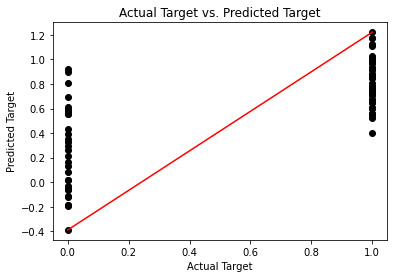

In [42]:
%matplotlib inline
plt.scatter(testing_test, prediction_of_test, color="black")
x0 = min(testing_test)
x1 = max(testing_test)
y0 = min(prediction_of_test)
y1 = max(prediction_of_test)
plt.plot([x0, x1], [y0, y1], color="red")

plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual Target vs. Predicted Target")

plt.show()